In [3]:
!pip install earthpy

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 932.9 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.2 MB/s eta 0:00:00


In [4]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

In [6]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

Extracted output to C:\Users\Gabriel\earth-analytics\data\colorado-flood\.


*** 
## **Open Raster Data in Open Source Python Using Rioxarray**
***

In [7]:
# Create a path to file
lidar_dtm_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "pre-flood",
    "lidar",
    "pre_DTM.tif",
)
lidar_dtm_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

In [8]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

# View the data - notice the data structure is different from geopandas data
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Explore Raster Data Values & Structure


In [9]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [10]:
lidar_dtm.values

array([[[      nan,       nan,       nan, ..., 1695.63  , 1695.4199,
         1695.4299],
        [      nan,       nan,       nan, ..., 1695.6   , 1695.5399,
         1695.36  ],
        [      nan,       nan,       nan, ..., 1695.38  , 1695.44  ,
         1695.37  ],
        ...,
        [      nan,       nan,       nan, ..., 1681.45  , 1681.39  ,
         1681.25  ],
        [      nan,       nan,       nan, ..., 1681.72  , 1681.57  ,
         1681.5599],
        [      nan,       nan,       nan, ..., 1681.89  , 1681.8099,
         1681.74  ]]], dtype=float32)

In [11]:
# View tha min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()> Size: 4B
array(1676.21, dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0 <xarray.DataArray ()> Size: 4B
array(2087.43, dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0


In [14]:
# View the dimensions of the array (rows and columns)
lidar_dtm.shape

(1, 2000, 4000)

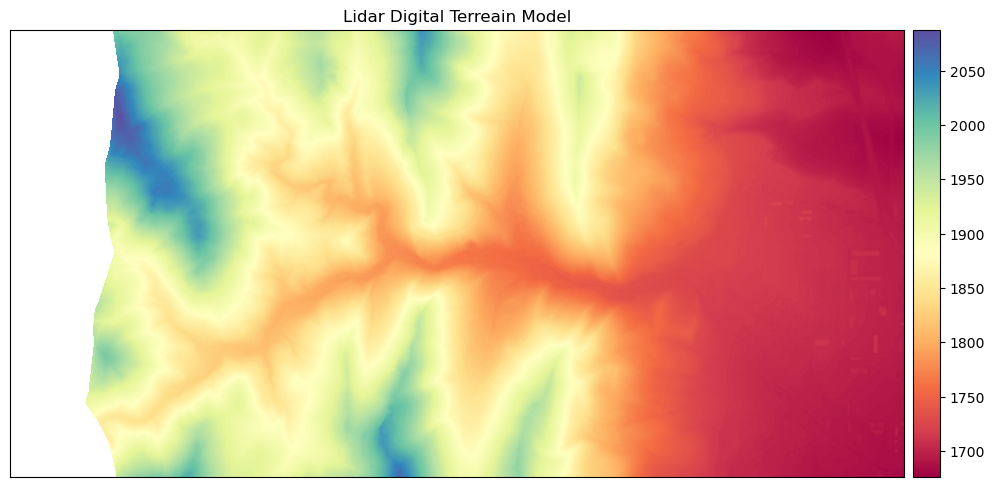

In [20]:
# Plot the data using earthpy.plot_bands
ep.plot_bands(
    lidar_dtm, scale=False, cmap="Spectral", title="Lidar Digital Terreain Model"
)
plt.show()

###  Challenge 1: Explore Elevation Data Values
Look closely at the plot above. What do you think the colors and numbers represent in the plot?

What units do the numbers represents?
elevation units in meters

### Challenge 2: Open & Plot a Raster Dataset
The above lidar DTM that you opened represents a dataset produced before a flood occurred in 2013 in Colorado. A path to a second lidar dataset which is for the same area but from data collected after the flood is below.

Use the code below to create a path to the post-flood data. Then do the following using the code above as a guide to open and plot your data:

1. Use `rioxarray` to open the data as a numpy array following the code that you used above
2. View the min and max data values for the output numpy array
3. Create a plot of the data

In [27]:
# Add the code here to open, show, and close the raster dataset.

lidar_dem_path_post_flood = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "post-flood",
    "lidar",
    "post_DTM.tif",
)

In [28]:
lidar_dem_path_post_flood

'colorado-flood\\spatial\\boulder-leehill-rd\\post-flood\\lidar\\post_DTM.tif'

In [31]:
# Open raster layer using rioxarray
lidar_dem_post = rxr.open_rasterio(lidar_dem_path_post_flood, masked=True)
lidar_dem_post

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [32]:
type(lidar_dem_post)

xarray.core.dataarray.DataArray

In [34]:
lidar_dem_post.values

array([[[2020.23  , 2019.4199, 2018.8099, ..., 1695.58  , 1695.5299,
         1695.5299],
        [2019.99  , 2019.23  , 2018.5499, ..., 1695.6599, 1695.52  ,
         1695.57  ],
        [2019.83  , 2019.0599, 2018.39  , ..., 1695.52  , 1695.4299,
         1695.49  ],
        ...,
        [1911.74  , 1911.57  , 1911.4099, ..., 1682.87  , 1682.8099,
         1682.8099],
        [1911.32  , 1911.1699, 1911.0599, ..., 1682.3999, 1682.5499,
         1682.63  ],
        [1910.9199, 1910.73  , 1910.64  , ..., 1682.19  , 1682.2799,
         1682.35  ]]], dtype=float32)

In [35]:
print(lidar_dem_post.min(), lidar_dem_post.max())

<xarray.DataArray ()> Size: 4B
array(1675.71, dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0 <xarray.DataArray ()> Size: 4B
array(2111.96, dtype=float32)
Coordinates:
    spatial_ref  int32 4B 0


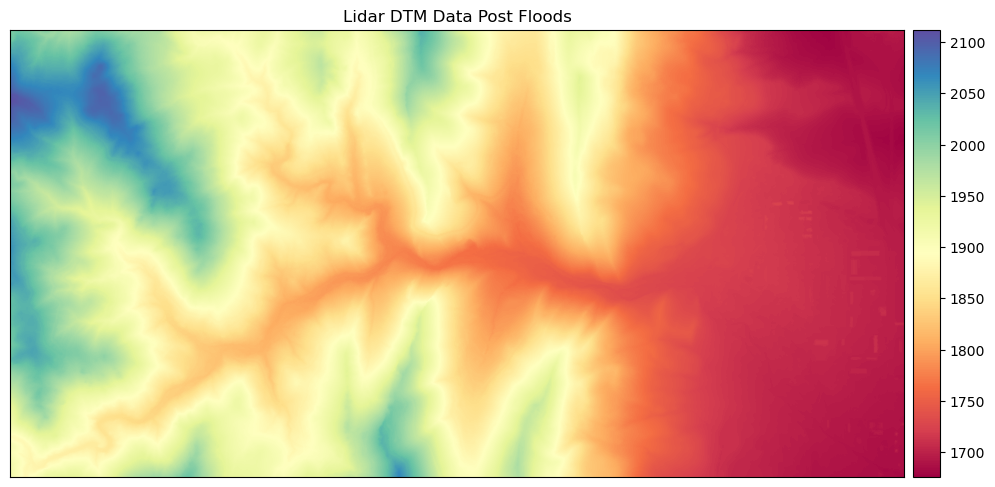

<Axes: title={'center': 'Lidar DTM Data Post Floods'}>

In [39]:
ep.plot_bands(
    lidar_dem_post.values,
    scale=False,
    cmap="Spectral",
    title="Lidar DTM Data Post Floods",
)

# Imagery - Another Type of Raster Data
---

In [40]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to C:\Users\Gabriel\earth-analytics\data\earthpy-downloads\naip-before-after


'C:\\Users\\Gabriel\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [44]:
# Create a path for the data file - notice is a .tif file
naip_pre_fire_path = os.path.join(
    "earthpy-downloads",
    "naip-before-after",
    "pre-fire",
    "crop",
    "m_3910505_nw_13_1_20150919_crop.tif",
)

naip_pre_fire_path

'earthpy-downloads\\naip-before-after\\pre-fire\\crop\\m_3910505_nw_13_1_20150919_crop.tif'

In [45]:
# Open the data usin rioxarray
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)
naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int32 16B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

- Plot of all NAIP Data Bands using earthpy plot_bands()

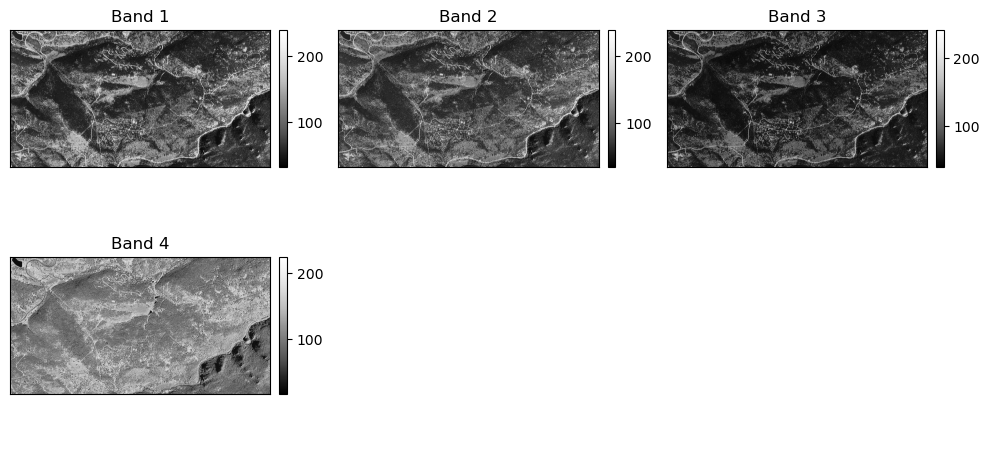

In [48]:
# Plot each band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

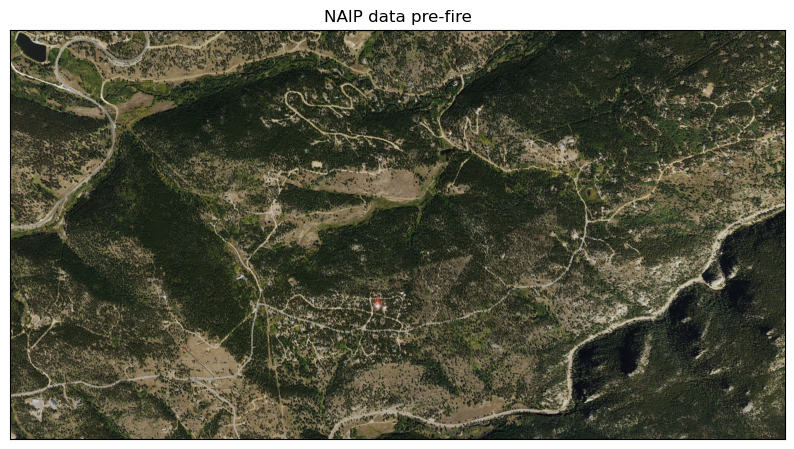

In [50]:
# Plot color image
ep.plot_rgb(naip_pre_fire.values, title="NAIP data pre-fire")
plt.show()

---
### Challenge: Plot NAIP Imagery Post Fire
In the code below, you see a path to NAIP dataset that was collected after the fire in Colorado. Use that path to:
1. Open the post fire data
2. Plot a color version of data using plot_rgb()
---

In [51]:
naip_post_fire_path = os.path.join(
    "earthpy-downloads",
    "naip-before-after",
    "post-fire",
    "crop",
    "m_3910505_nw_13_1_20170902_crop.tif",
)

naip_post_fire_path

'earthpy-downloads\\naip-before-after\\post-fire\\crop\\m_3910505_nw_13_1_20170902_crop.tif'

In [52]:
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)
naip_post_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int32 16B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  234
    STATISTICS_MEAN:     63.874147003881
    STATISTICS_MINIMUM:  6
    STATISTICS_STDDEV:   47.250919834769
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_37264\2682751963.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


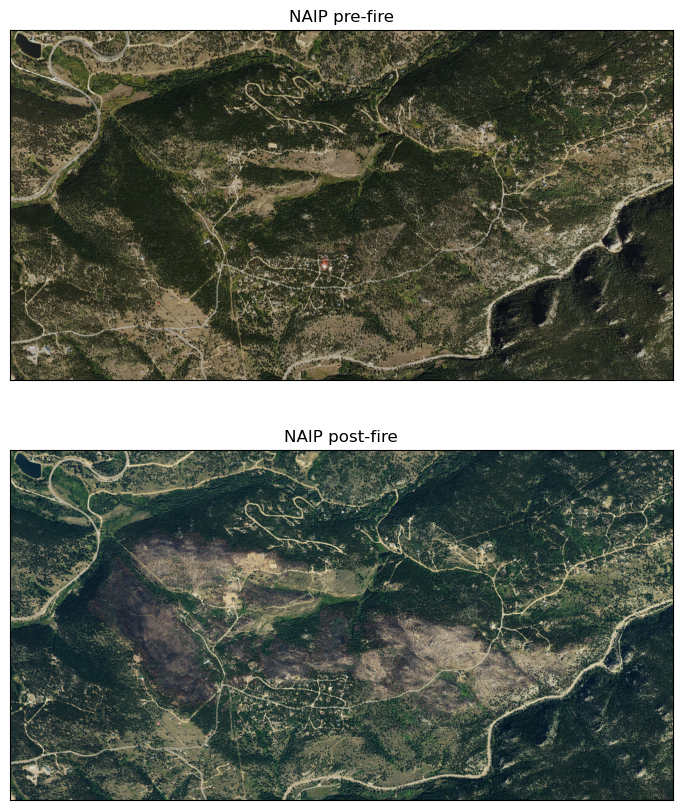

In [61]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 10))
ep.plot_rgb(naip_pre_fire.values, ax=ax[0], title="NAIP pre-fire")
ep.plot_rgb(naip_post_fire.values, ax=ax[1], title="NAIP post-fire")
fig.show()